In [1]:
import pandas as pd

digits_training_data = pd.read_csv('./train.csv')

# X is all the features I will be training the dataset on 
X = digits_training_data.copy()
# y is the prediction target
# pop label from the X and at the same time set the target
y = X.pop('label')

X.head()
# y.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.model_selection import train_test_split

# use part of the data from training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)

In [3]:
X_train.shape # (31500, 784)

(31500, 784)

duomenis reikia pasidaryti 28x28 nes tai yra nuotrauka

In [23]:
from tensorflow.keras.utils import to_categorical

picture_height, picture_width = 28, 28
number_type_count = 10

def reshape_digits_data(data):
    number_of_images = data.shape[0]
    shaped_data = data.values.reshape(number_of_images, picture_height, picture_width, 1) # 1 is grayscale
    return shaped_data

# to categorical pavercia reiksmes i vektoriu, jis reikalinas categorical_crossentropy.
def transform_digits_labels(labels):
    return to_categorical(labels, number_type_count)


C:\Users\laimo\anaconda3\envs\tf\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


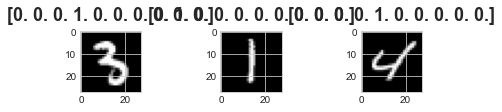

In [24]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# use part of the data from training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)

#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = reshape_digits_data(X_train)
y_train = transform_digits_labels(y_train)

X_valid = reshape_digits_data(X_valid)
y_valid = transform_digits_labels(y_valid)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

SOFTMAX padaro kad priskiria artimiausiai reiksmei

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

# input_shape is the shape of the input data
# 28x28 nuotrauka ir 1 gray scale
model = keras.Sequential([
    layers.BatchNormalization(input_shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),

    layers.BatchNormalization(),
    layers.Flatten(),

    layers.Dense(10, activation='softmax'),
])

In [29]:
# min_delta is the minimum change in the monitored quantity to qualify as an improvement, which is used for early stopping.
# patience is the number of epochs with no improvement after which training will be stopped.

early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)

optimizer = keras.optimizers.Adam(lr=0.001)
# optimizer is the algorithm used to update the weights of the model.
# loss is the loss function to be minimized by the model.
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# batch size is the number of samples (rows) that will be processed at a time
# epochs is the number of times the entire dataset will be processed
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=1000,
    callbacks=[early_stopping],
)

Epoch 1/1000
493/493 [==============================] - 2s 4ms/step - loss: 0.2992 - accuracy: 0.9112 - val_loss: 0.1851 - val_accuracy: 0.9437
Epoch 2/1000
493/493 [==============================] - 2s 3ms/step - loss: 0.1354 - accuracy: 0.9619 - val_loss: 0.1420 - val_accuracy: 0.9562
Epoch 3/1000
493/493 [==============================] - 2s 3ms/step - loss: 0.0897 - accuracy: 0.9731 - val_loss: 0.1171 - val_accuracy: 0.9633
Epoch 4/1000
493/493 [==============================] - 1s 3ms/step - loss: 0.0692 - accuracy: 0.9796 - val_loss: 0.1168 - val_accuracy: 0.9633
Epoch 5/1000
493/493 [==============================] - 1s 3ms/step - loss: 0.0525 - accuracy: 0.9849 - val_loss: 0.1120 - val_accuracy: 0.9655
Epoch 6/1000
493/493 [==============================] - 2s 3ms/step - loss: 0.0431 - accuracy: 0.9876 - val_loss: 0.1122 - val_accuracy: 0.9670
Epoch 7/1000
493/493 [==============================] - 1s 3ms/step - loss: 0.0343 - accuracy: 0.9904 - val_loss: 0.1134 - val_accuracy:

Minimum Validation Loss: 0.1323


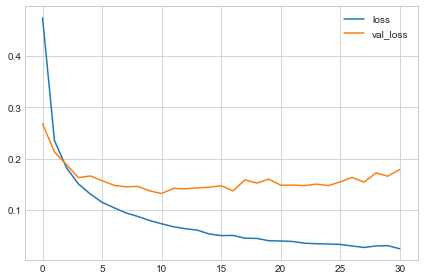

In [15]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

butinai reikia predict_classes

In [21]:
digits_training_data = pd.read_csv('./test.csv')
test_X = reshape_digits_data(digits_training_data.copy())

prediction = model.predict_classes(test_X)

submissions=pd.DataFrame({"ImageId": list(range(1,len(prediction)+1)),
                         "Label": prediction})
submissions.to_csv("DR2.csv", index=False, header=True)

C:\Users\laimo\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[2 0 9 ... 3 9 2]


PREDICTION SCORE 0.95878